# Project 1- Group 37

# 1 Packages

In [1]:
import numpy as np
import pandas as pd
import sys
import time
import matplotlib.pyplot as plt
import preProcessing  as prePros
import LogisticRegression as LR
import modelEvaluation as ME
import NaiveBayes as NB

# 2 Dataset

In [2]:
#Iris Dataset
file_path = '../data/Iris/Iris.csv'
output='y'
headers_Names= ["sepal_length","sepal_width", "petal_length","petal_width","y"]
df  = pd.read_csv(file_path,delimiter=',',header=None,names=headers_Names)
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,y
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2.1 Data Preprocessing

In [3]:
#label encoder 
df['y'] = df['y'].replace(['Iris-setosa'], 0)
df['y'] = df['y'].replace(['Iris-virginica', 'Iris-versicolor'],1)
# Add a flag column for cleaning purpose
df=prePros.createFlag(df)
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,y,flag
0,5.1,3.5,1.4,0.2,0,ok
1,4.9,3.0,1.4,0.2,0,ok
2,4.7,3.2,1.3,0.2,0,ok
3,4.6,3.1,1.5,0.2,0,ok
4,5.0,3.6,1.4,0.2,0,ok


In [4]:
# Delete spaces and replace speceial characters by NAN
df=prePros.cleanSpecialChar(df)
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,y,flag
0,5.1,3.5,1.4,0.2,0,ok
1,4.9,3.0,1.4,0.2,0,ok
2,4.7,3.2,1.3,0.2,0,ok
3,4.6,3.1,1.5,0.2,0,ok
4,5.0,3.6,1.4,0.2,0,ok


In [5]:
# highlights missing values
df=prePros.flagNan(df)
df.head(5)

Instances with missing values:0


,sepal_length,sepal_width,petal_length,petal_width,y,flag
0,5.1,3.5,1.4,0.2,0,ok
1,4.9,3.0,1.4,0.2,0,ok
2,4.7,3.2,1.3,0.2,0,ok
3,4.6,3.1,1.5,0.2,0,ok
4,5.0,3.6,1.4,0.2,0,ok


In [6]:
#highlights duplicate instances
df=prePros.flagDuplicates(df)
df.head(5)

 Duplicated Instances:3


,sepal_length,sepal_width,petal_length,petal_width,y,flag
0,5.1,3.5,1.4,0.2,0,ok
1,4.9,3.0,1.4,0.2,0,ok
2,4.7,3.2,1.3,0.2,0,ok
3,4.6,3.1,1.5,0.2,0,ok
4,5.0,3.6,1.4,0.2,0,ok


In [7]:
# delete flaged row
df=prePros.delRows(df,'ok')
df.head(5)

Remaining instances:147


,sepal_length,sepal_width,petal_length,petal_width,y,flag
0,5.1,3.5,1.4,0.2,0,ok
1,4.9,3.0,1.4,0.2,0,ok
2,4.7,3.2,1.3,0.2,0,ok
3,4.6,3.1,1.5,0.2,0,ok
4,5.0,3.6,1.4,0.2,0,ok


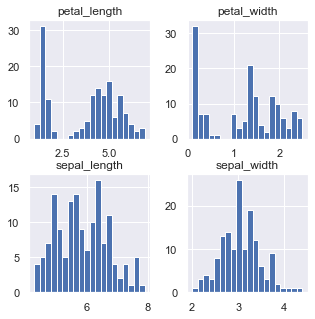

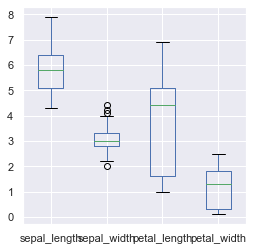

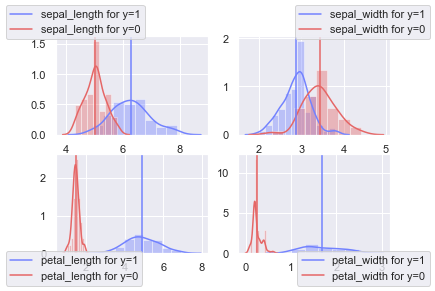

Created Iris.png


In [8]:
# Histogram; ploting the underlying distribution of each features
# in order to understand the nature of each feature and remove malformed features

# it is noticed that captial-loss, capital-gain, native country and race features can be removed
# they are malformed features, (>80%) of the data represents the same class

#plottedFeatures = [c for c in df.columns if c != 'flag']
plottedFeatures=["sepal_length","sepal_width", "petal_length","petal_width"]
prePros.draw_histogram(df[plottedFeatures], bins=20, width=5, height=5)
#print ('There are two malformed features, lm1 and Re1')

plottedFeaturesboxplot=["sepal_length","sepal_width", "petal_length","petal_width"]
#plottedFeaturesboxplot = [c for c in df.columns if c != 'flag']
xlable = [1 for c in df.columns if c != 'flag']
prePros.draw_boxplots(df, plottedFeaturesboxplot)
#plot Distribution of the features by the Output
prePros.plot_dist_by_category(df, plottedFeaturesboxplot, 'y', 'y', "Iris")

In [9]:
print ('No malformed data in Iris dataset')

No malformed data in Iris dataset


In [10]:
# Correlation Coefficients: 
# To study the association between each feature with the output y
y_vars = ["y"]
x_vars = [var for var in df.columns.tolist() if not var in y_vars]
xlable=np.ones((1,32))
corr = df[x_vars + ['y']].corr()
print('The output-y is highly correlated with spread1, spread2, and PPE')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


The output-y is highly correlated with spread1, spread2, and PPE


,sepal_length,sepal_width,petal_length,petal_width,y
sepal_length,1,-0.11,0.87,0.82,0.71
sepal_width,-0.11,1,-0.42,-0.36,-0.6
petal_length,0.87,-0.42,1,0.96,0.92
petal_width,0.82,-0.36,0.96,1,0.88
y,0.71,-0.6,0.92,0.88,1


# 2.2 Data Splitting

In [11]:
# Data Spliting
df_test= pd.DataFrame(None)
df=prePros.get_cleaned_data_Iris(df, [''],[''])
x_headers,y_header=prePros.define_variables(df,output)
X_train1, y_train, X_test1, y_test=prePros.Data_spliting(df,df_test, x_headers,y_header, training_percent=0.85, shuffle=True, random_seed_value=42)

X_train,X_test=prePros.prepXforLR(X_train1,X_test1)
    


Instances with missing values:0
Remaining instances:147
No duplicates
(147, 5)
(124, 4)
(23, 4)
